## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

## Lê os dados

In [10]:
df_municipio = pd.read_csv('tabelas/municipio.csv').drop("Unnamed: 0", axis=1)
df_regiaocovid = pd.read_csv('tabelas/regiaocovid.csv').drop("Unnamed: 0", axis=1)
df_sexo = pd.read_csv('tabelas/sexo.csv').drop("Unnamed: 0", axis=1)
df_faixaetaria = pd.read_csv('tabelas/faixaetaria.csv').drop("Unnamed: 0", axis=1)
df_criterio = pd.read_csv('tabelas/criterio.csv').drop("Unnamed: 0", axis=1)
df_evolucao = pd.read_csv('tabelas/evolucao.csv').drop("Unnamed: 0", axis=1)
df_racacor = pd.read_csv('tabelas/racacor.csv').drop("Unnamed: 0", axis=1)
df_caso = pd.read_csv('tabelas/caso.csv').drop("Unnamed: 0", axis=1)

all_dfs = [df_municipio, df_regiaocovid, df_sexo, df_faixaetaria, df_criterio, df_evolucao, df_racacor, df_caso]

C:\Users\Visagio\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df = pd.concat(all_dfs, axis = 1)
df.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,COD_SEXO,SEXO,COD_FAIXAETARIA,FAIXAETARIA,COD_CRITERIO,CRITERIO,...,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,PROFISSIONAL_SAUDE,SRAG,PES_PRIV_LIBERDADE
0,430003.0,ACEGUÁ,16.0,BAGE - R22,0.0,Feminino,0.0,30 a 39,0.0,RT-PCR,...,NAO,NAO,NAO,NaN,NAO,NaN,21/06/2021,NAO,NAO,NAO
1,430005.0,ÁGUA SANTA,14.0,PASSO FUNDO - R17 R18 R19,1.0,Masculino,1.0,50 a 59,1.0,TESTE RÁPIDO,...,SIM,NAO,NAO,NaN,NAO,NaN,20/06/2021,NAO,NAO,NAO
2,430010.0,AGUDO,1.0,SANTA MARIA - R01 R02,NaN,NaN,2.0,40 a 49,2.0,Outros Testes,...,NAO,NAO,NAO,NaN,NAO,NaN,26/06/2021,NAO,NAO,NAO
3,430020.0,AJURICABA,10.0,IJUI - R13,NaN,NaN,3.0,20 a 29,3.0,Clínico Epidemiológico,...,NAO,NAO,NAO,NaN,NAO,NaN,27/06/2021,NAO,NAO,NAO
4,430030.0,ALECRIM,11.0,SANTA ROSA - R14,NaN,NaN,4.0,70 a 79,4.0,Clínico-Imagem,...,NAO,NAO,NAO,NaN,NAO,NaN,19/04/2021,NAO,NAO,NAO


## Modelo

### Para utilizar o Modelo devemos agrupar os dados em tabela, assim conseguimos realizar análise do conjunto de dados, e a partir disto obter insights que irão contribuir para a construção do modelo.

In [13]:
df.columns

Index(['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID', 'COD_SEXO',
       'SEXO', 'COD_FAIXAETARIA', 'FAIXAETARIA', 'COD_CRITERIO', 'CRITERIO',
       'COD_EVOLUCAO', 'EVOLUCAO', 'COD_RACA_COR', 'RACA_COR', 'COD_IBGE',
       'COD_REGIAO_COVID', 'COD_SEXO', 'COD_FAIXAETARIA', 'COD_CRITERIO',
       'COD_EVOLUCAO', 'COD_RACA_COR', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS',
       'DATA_INCLUSAO', 'HOSPITALIZADO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'OUTROS', 'CONDICOES', 'GESTANTE', 'DATA_INCLUSAO_OBITO',
       'DATA_EVOLUCAO_ESTIMADA', 'PROFISSIONAL_SAUDE', 'SRAG',
       'PES_PRIV_LIBERDADE'],
      dtype='object')

In [14]:
df.head(2)

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,COD_SEXO,SEXO,COD_FAIXAETARIA,FAIXAETARIA,COD_CRITERIO,CRITERIO,...,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,PROFISSIONAL_SAUDE,SRAG,PES_PRIV_LIBERDADE
0,430003.0,ACEGUÁ,16.0,BAGE - R22,0.0,Feminino,0.0,30 a 39,0.0,RT-PCR,...,NAO,NAO,NAO,NaN,NAO,NaN,21/06/2021,NAO,NAO,NAO
1,430005.0,ÁGUA SANTA,14.0,PASSO FUNDO - R17 R18 R19,1.0,Masculino,1.0,50 a 59,1.0,TESTE RÁPIDO,...,SIM,NAO,NAO,NaN,NAO,NaN,20/06/2021,NAO,NAO,NAO


## Data Prep

### Cria coluna para predição

In [15]:
df["Obito"] = df.apply(lambda x: 1 if pd.notna(x["DATA_INCLUSAO_OBITO"]) else 0, axis = 1)

### Drop some columns

In [16]:
df.EVOLUCAO.unique()

array(['RECUPERADO', 'OBITO', 'EM ACOMPANHAMENTO', 'OBITO OUTRAS CAUSAS',
       nan], dtype=object)

In [19]:
df_filtered = df[["DATA_INCLUSAO_OBITO", "COD_REGIAO_COVID", "COD_SEXO", "COD_FAIXAETARIA", "COD_CRITERIO", "COD_EVOLUCAO", "COD_RACA_COR",
"COD_SEXO", "HOSPITALIZADO", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "GESTANTE", "PROFISSIONAL_SAUDE", "SRAG", "Obito"]]

df_filtered.head()

,DATA_INCLUSAO_OBITO,COD_REGIAO_COVID,COD_REGIAO_COVID,COD_SEXO,COD_SEXO,COD_FAIXAETARIA,COD_FAIXAETARIA,COD_CRITERIO,COD_CRITERIO,COD_EVOLUCAO,...,COD_SEXO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,GESTANTE,PROFISSIONAL_SAUDE,SRAG,Obito
0,NaN,16.0,16,0.0,0,0.0,0,0.0,0,0.0,...,0,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,0
1,NaN,14.0,16,1.0,0,1.0,0,1.0,0,1.0,...,0,NAO,SIM,SIM,SIM,NAO,NAO,NAO,NAO,0
2,NaN,1.0,16,NaN,0,2.0,0,2.0,0,2.0,...,0,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,0
3,NaN,10.0,16,NaN,0,3.0,0,3.0,0,3.0,...,0,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,0
4,NaN,11.0,16,NaN,0,4.0,0,4.0,0,NaN,...,0,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,0


In [20]:
df_filtered = df_filtered.query("Obito == 1")

In [21]:
df_filtered.shape

(36081, 24)

### Aplica técnicas de codificação

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = df_filtered.drop(["DATA_INCLUSAO_OBITO", "Obito"], axis=1)

enc_x = enc.fit_transform(enc_df)

enc_df = pd.DataFrame(enc_x.toarray())

enc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


### Agregar coluas de Data e Obito

In [29]:
time_series = pd.concat([df_filtered.loc[:, "DATA_INCLUSAO_OBITO"].reset_index(), enc_df, df_filtered.loc[:, "Obito"].reset_index()], axis=1)

In [30]:
time_series.drop("index", inplace=True, axis=1)

time_series = time_series.groupby("DATA_INCLUSAO_OBITO", as_index=False).sum()

time_series.head()

,DATA_INCLUSAO_OBITO,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,Obito
0,01/01/2021,45.0,1.0,0.0,3.0,2.0,1.0,3.0,14.0,2.0,...,6.0,0.0,10.0,35.0,0.0,45.0,0.0,45.0,45.0,45
1,01/02/2021,46.0,4.0,4.0,1.0,2.0,4.0,0.0,4.0,1.0,...,10.0,0.0,7.0,39.0,0.0,46.0,0.0,46.0,46.0,46
2,01/03/2021,77.0,0.0,1.0,5.0,1.0,3.0,5.0,8.0,6.0,...,11.0,0.0,8.0,69.0,0.0,77.0,0.0,77.0,77.0,77
3,01/04/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1
4,01/04/2021,327.0,20.0,20.0,12.0,17.0,21.0,27.0,105.0,6.0,...,56.0,0.0,59.0,268.0,0.0,326.0,1.0,327.0,327.0,327


### Seleciona os conjuntos de variáveis dependentes e independentes

In [31]:
X = time_series.iloc[:, 1:79]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,45.0,1.0,0.0,3.0,2.0,1.0,3.0,14.0,2.0,0.0,...,39.0,6.0,0.0,10.0,35.0,0.0,45.0,0.0,45.0,45.0
1,46.0,4.0,4.0,1.0,2.0,4.0,0.0,4.0,1.0,0.0,...,36.0,10.0,0.0,7.0,39.0,0.0,46.0,0.0,46.0,46.0
2,77.0,0.0,1.0,5.0,1.0,3.0,5.0,8.0,6.0,3.0,...,66.0,11.0,0.0,8.0,69.0,0.0,77.0,0.0,77.0,77.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,327.0,20.0,20.0,12.0,17.0,21.0,27.0,105.0,6.0,2.0,...,271.0,56.0,0.0,59.0,268.0,0.0,326.0,1.0,327.0,327.0


In [32]:
y = time_series.iloc[:, 79]
y.head()

0     45
1     46
2     77
3      1
4    327
Name: Obito, dtype: int64

### Divide em treino e teste

In [34]:
def TimeSeriesTrainTestSplit(x, y, test_size):
    
        test_index = int(len(x)*(1-test_size))
    
        X_train = x.iloc[:test_index]
        y_train = y.iloc[:test_index]
        X_test = x.iloc[test_index:]
        y_test = y.iloc[test_index:]
        return X_train, y_train, X_test, y_test
    
X_train, y_train, X_test, y_test = TimeSeriesTrainTestSplit(X, y, 0.1)

### Cria modelo para regressão

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = regressor.predict(X_test)

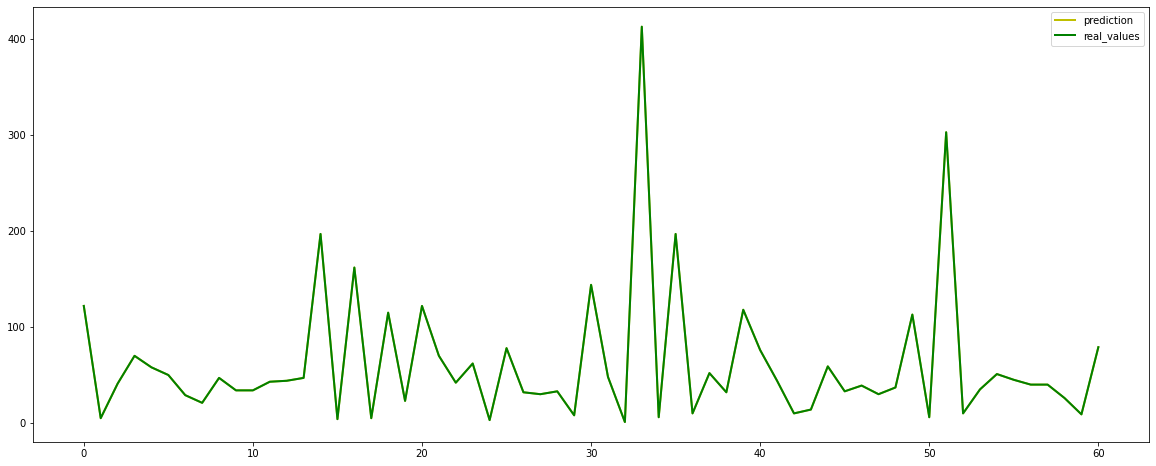

In [37]:
plt.figure(figsize=(20,8))
plt.plot(regressor.predict(X_test[-400:]), "y", label="prediction", linewidth=2.0)
plt.plot(y_test.values[-400:], "g", label="real_values", linewidth=2.0)
plt.legend(loc="best")